# imports

In [2]:
# basic libs
import math
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt

# plot settings

In [3]:
# setting for plots
import matplotlib

# output image quality
%config InlineBackend.figure_format = 'retina'

# set pyplot stype
plt.style.use('dark_background') # see more with plt.style.available


# defaut figsize
matplotlib.rcParams['figure.figsize'] = [6,4]

# defaut fontsize
font = {'size':14}
matplotlib.rc('font', **font)

# color pallete
colors = ['#2F58EB', '#773BEB', '#12B8EB', '#EB9846', '#8b8b8b', '#810f7c']

In [4]:
def clean_ax(ax):
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks([])
    # for minor ticks
    ax.set_yticks([], minor=True)
    return ax

# data

In [107]:
np.random.seed(0)

data = pd.read_csv("../Experiments/titanic-kaggle/train.csv")

data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [108]:
import utils

In [109]:
utils.clean_data(data)

features = ["Pclass","Age","Sex","SibSp",'Survived']
data = data[features]
data.head(3)

,Pclass,Age,Sex,SibSp,Survived
0,3,22.0,0,1,0
1,1,38.0,1,1,1
2,3,26.0,1,0,1


In [110]:
data.shape

(891, 5)

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = data[features].drop(columns='Survived')
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=314)

In [122]:
print(y_train.shape)
print(y_test.shape)

(712,)
(179,)


# Model

In [113]:
from sklearn import tree, model_selection

In [114]:

decision_tree = tree.DecisionTreeClassifier(
    random_state =1,
    max_depth=7,
    min_samples_split=2)


In [126]:
model = decision_tree.fit(X_train,y_train)
t_hat = model.score(X_test,y_test)
print( '%.3f' %t_hat )

0.855


In [127]:
def bootstrap(function, X,y, B):
    """
    """
    f_hat = []
    
    for i in range(B):
        X_b = X.sample(replace=True,frac=1)
        y_b  = y[X_b.index]
        
        
        estimate = function(X_b,y_b)
        f_hat.append(estimate)
        
    return np.array(sorted(f_hat))

In [128]:
B = 200

t_B = bootstrap(model.score, X_test,y_test, B=B)

In [118]:
# compute standard error
se = np.std(t_B)

CI_std = [t_hat-1.96*se,t_hat+1.96*se]

In [119]:
def plot_hist(t_hat,t_B,title=''):

    fig,ax = plt.subplots()

    ax = clean_ax(ax)

    cb = '#001d7d'
#     cb = '#5d016e'

    # plot hist t_B
    _ = plt.hist(t_B, bins = 'auto',color=cb,rwidth=0.9)

    # plotting CI
    i = 3
    plt.axvline(x=t_hat,color=colors[i])
    plt.text(s=r"$\hat{\theta}$",x=t_hat,y=10,color=colors[i],weight='bold')


    plt.title(r''+title)
    plt.xlabel(r'$\hat{\theta}^*$')

def plot_CI(t_hat,t_B,CI,title=''):

    fig,ax = plt.subplots()

    ax = clean_ax(ax)

    cb = '#001d7d'
#     cb = '#5d016e'

    # plot hist t_B
    _ = plt.hist(t_B, bins = 'auto',color=cb,rwidth=0.9)
    plt.xlabel(r'$\hat{\theta}^*$')

    # plotting CI
    for li in CI:
        plt.axvline(x=li,color='yellow',ls='--')
        plt.text(s="%.3f" %li,x=li,y=1,color='yellow',weight='bold')


    # plotting CI
    i = 2
    plt.axvline(x=t_hat,color=colors[i])
    plt.text(s=r"$\hat{\theta}$",x=t_hat,y=10,color=colors[i],weight='bold')

    plt.title(r''+title)

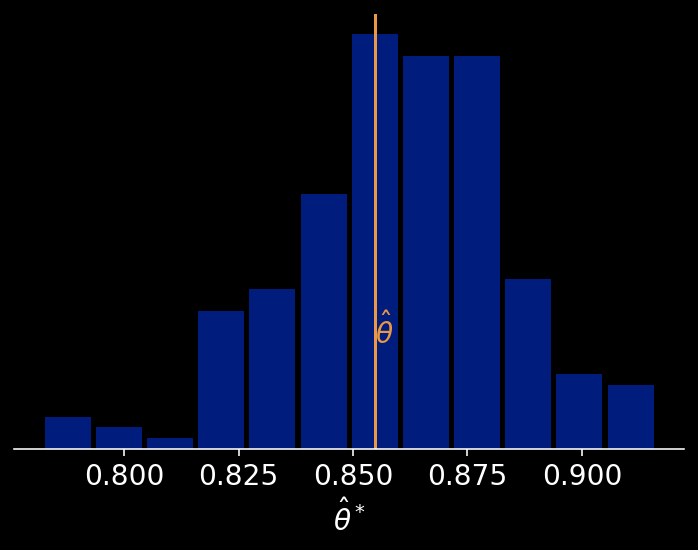

In [120]:
plot_hist(t_hat,t_B,title='')

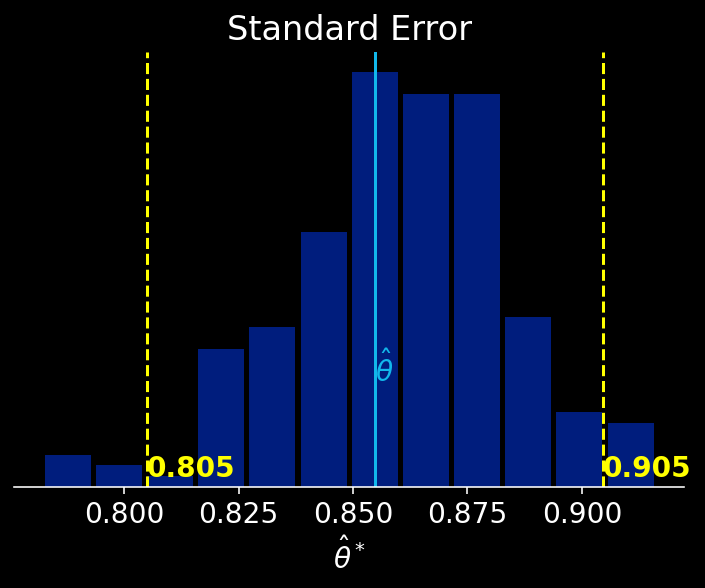

In [121]:
plot_CI(t_hat,t_B,CI_std,title='Standard Error')

In [129]:
# compute percentile

CI_per = [np.percentile(t_B,2.5), np.percentile(t_B,97.5)]



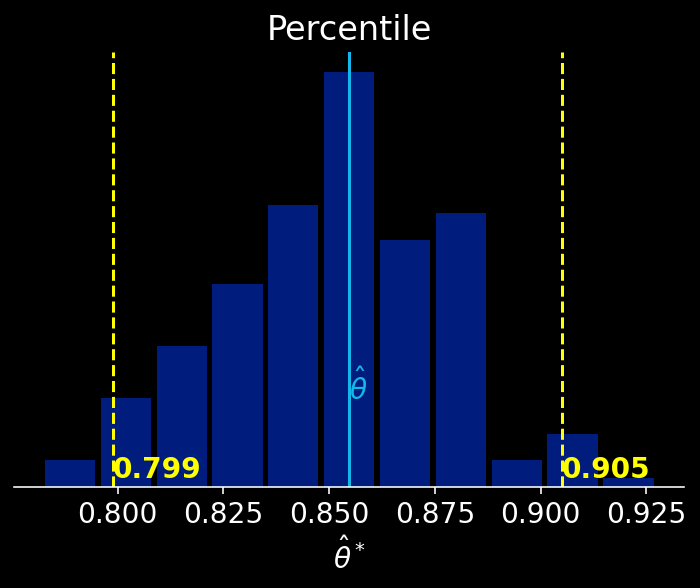

In [130]:
plot_CI(t_hat,t_B,CI_per,title='Percentile')

In [131]:
from scipy.stats import norm

In [132]:
t_hat

0.8547486033519553

In [133]:
p0 = len(t_B[ t_B < t_hat]) / B

z0 = norm.ppf(p0)  # (inverse of cum. distr. func.)

alpha_BC = norm.cdf(2*z0+1.96)

per_low = 100*(1-alpha_BC)/2
per_up = 100*alpha_BC + per_low
t_low = np.percentile(t_B,per_low )
t_up = np.percentile(t_B,per_up)

CI_BC = [t_low,t_up]

print(p0,z0,alpha_BC,t_low,t_up)

0.525 0.06270677794321385 0.9814841113008385 0.7915344237493472 0.9106145251396648


In [134]:
per_low,per_up

(0.9257944349580771, 99.07420556504192)

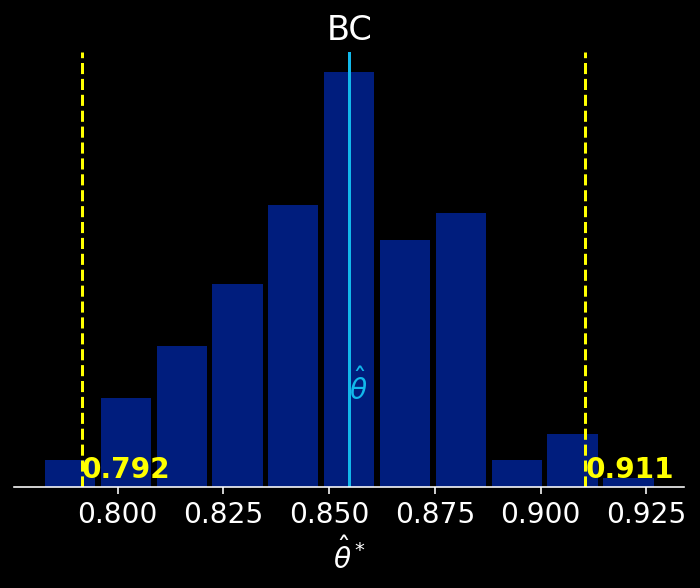

In [135]:
plot_CI(t_hat,t_B,CI_BC,title='BC')

In [149]:
X_JR = X_test.sample(2).copy()
X_JR.head()

,Pclass,Age,Sex,SibSp
463,2,48.0,0,0
240,3,28.0,1,1


In [151]:
X_JR['Pclass'] = [3,1]
X_JR['Age']    =  [19,17]
X_JR['Sex']    = [0,1]
X_JR['SibSp']  = [0,1]
X_JR.head()

,Pclass,Age,Sex,SibSp
463,3,19,0,0
240,1,17,1,1


In [152]:
model.predict_proba(X_JR)[:,1]

array([0.10714286, 1.        ])